## Import Necessary Modules

In [1]:
import calendar
import numpy as np
import pandas as pda
import seaborn as sn
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt

## Reading the data

In [3]:
data = pd.read_csv('hour.csv', sep = ',')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Data Types Analysis

In [4]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Handle Categorical Variables

In [6]:
seasonMap = {1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" }
weatherMap = {1: " Clear + Few clouds + Partly cloudy + Partly cloudy",
              2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", 
              3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", 
              4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " }

data["weekday"] = data.dteday.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
data["season"] = data.season.map(seasonMap)
data["weather"] = data.weathersit.map(weatherMap)

categoryVariableList  = ["hr","weekday","mnth","season","weather","holiday","workingday"]
for var in categoryVariableList:
    data[var] = data[var].astype("category")
    
data.dtypes

instant          int64
dteday          object
season        category
yr               int64
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit       int64
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
weather       category
dtype: object

In [7]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weather
0,1,2011-01-01,Spring,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16,Clear + Few clouds + Partly cloudy + Partly c...
1,2,2011-01-01,Spring,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40,Clear + Few clouds + Partly cloudy + Partly c...
2,3,2011-01-01,Spring,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32,Clear + Few clouds + Partly cloudy + Partly c...
3,4,2011-01-01,Spring,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13,Clear + Few clouds + Partly cloudy + Partly c...
4,5,2011-01-01,Spring,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1,Clear + Few clouds + Partly cloudy + Partly c...


## Missing Data Detection

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
weather       0
dtype: int64


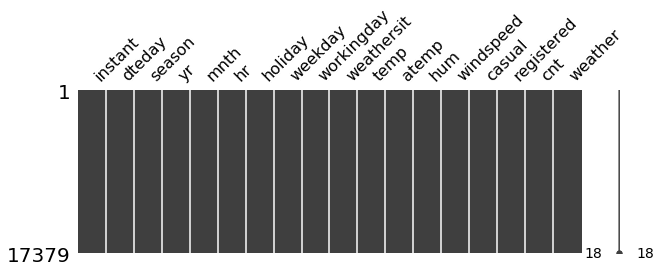

In [9]:
print(data.isnull().sum())
msno.matrix(data,figsize=(10,3))

## Outliers Analysis

[Text(0,0.5,'Count'),
 Text(0.5,0,'Working Day'),
 Text(0.5,1,'Box Plot On Count/Working Day Distribution')]

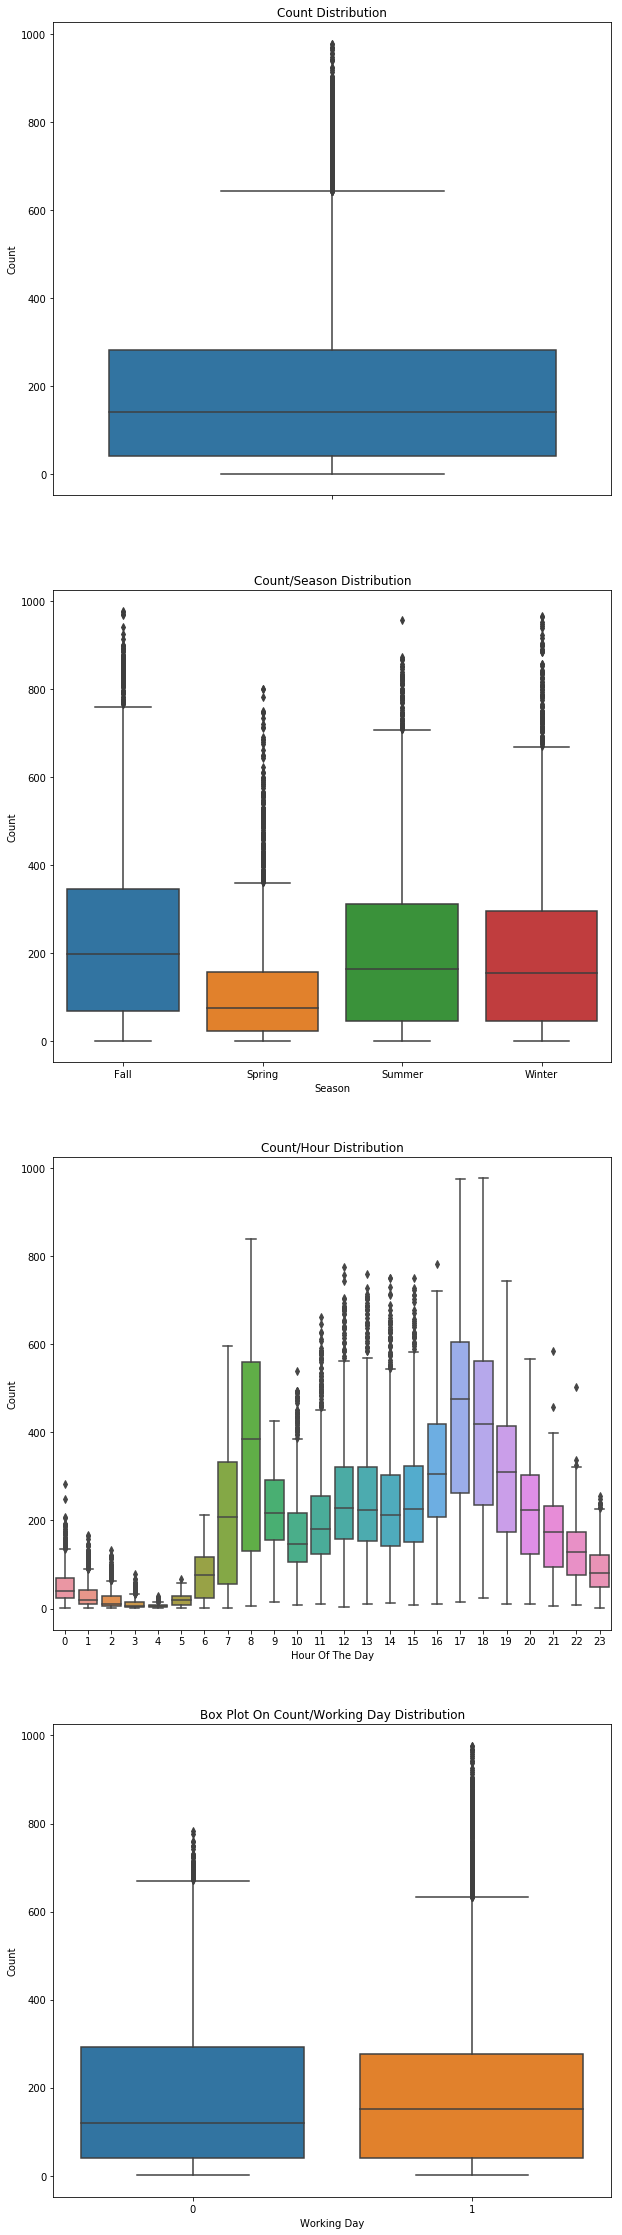

In [6]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 40)
sn.boxplot(data=data,y="cnt",orient="v",ax=axes[0])
sn.boxplot(data=data,y="cnt",x="season",orient="v",ax=axes[1])
sn.boxplot(data=data,y="cnt",x="hr",orient="v",ax=axes[2])
sn.boxplot(data=data,y="cnt",x="workingday",orient="v",ax=axes[3])

axes[0].set(ylabel='Count',title="Count Distribution")
axes[1].set(xlabel='Season', ylabel='Count',title="Count/Season Distribution")
axes[2].set(xlabel='Hour Of The Day', ylabel='Count',title="Count/Hour Distribution")
axes[3].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count/Working Day Distribution")

## Correlation Analysis

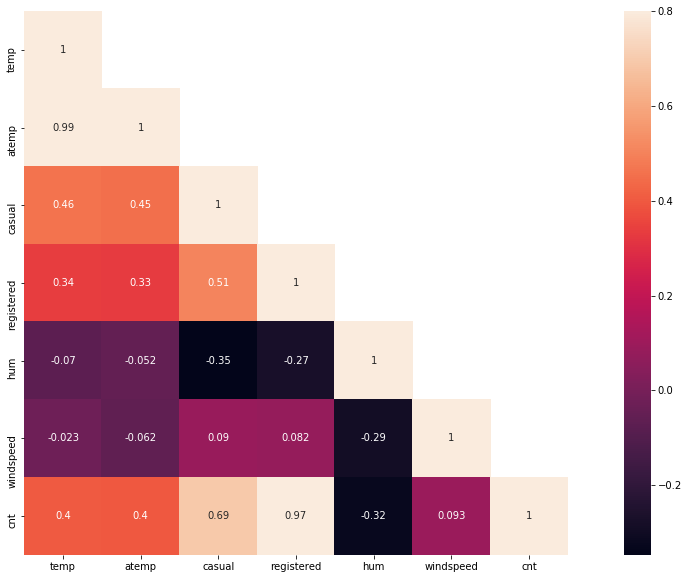

In [12]:
corrMatt = data[["temp","atemp","casual","registered","hum","windspeed","cnt"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)